---
# [ Project ] 구글 플레이 스토어 데이터를 활용한 데이터 분석

----
####  본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 분석의 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
1) 설치수와 평점 사이에 관계가 있는지를 알아봅니다. <br>
2) 1번의 결과를 유료앱과 무료앱으로 나누어서 분석해봅니다. <br>
3) Category별 점유율을 구하고, 설치수와 평점의 평균을 구해봅니다.

--- 
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 구글 플레이 스토어 데이터입니다.
   - https://www.kaggle.com/lava18/google-play-store-apps 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.
   
### ③ 필드 ###
- App, Category, Rating, Reviews  
- Size, Installs, Type, Price  
- Content Rating, Genres, Last Updated, Current Ver, Android Ver      


----

## 2. 데이터 읽기

### 해당 챕터의 목표
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.

제공되는 코드

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- read_csv, columns, shape

### [ Quiz 1] pandas의 함수를 사용하여 googleplaystore.csv을 읽어와 data라는 이름의 변수로 저장합니다.

In [2]:
# 변경전 데이터와 변경 후 데이터를 비교해 보기위해 .copy사용
df1 = pd.read_csv('googleplaystore.csv')
data = df1.copy()
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### [Quiz 2]data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.

In [3]:
# info로도 확인가능합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
print('필드명 : ', data.columns)
print('필드 개수 : ', data.shape[1])
print('데이터 수 : ', data.shape[0])
print('쉐이프 : ', data.shape)
print('각 필드별 데이터 개수 : \n', data.count())

필드명 :  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
필드 개수 :  13
데이터 수 :  10841
쉐이프 :  (10841, 13)
각 필드별 데이터 개수 : 
 App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64


----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다. 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- apply, lambda, replace
- 참고 링크 : https://datatofish.com/if-condition-in-pandas-dataframe/

### [Quiz 3] Installs 필드에 'Free'값으로 되어 있는 데이터를 필터(제거)합니다.

In [5]:
# 먼저 해당 필드 값이 어떻게 구성되어있는지 확인합니다.
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [6]:
# free를 제거합니다.free는 위에서 봤을때 한개입니다.
data = data.loc[data['Installs'] != 'Free']

### [Quiz 4]  Quiz3의 결과를 사용 : Installs 필드의 데이터에서 +와 ,를 제거한 후 숫자 타입으로 치환합니다.
<br> (참고: 1.의 필터 이후(->Quiz3의 처리 이후)의 데이터는 '1,000,000+'와 같이 되어있습니다.)

In [7]:
# +, 제거
# apply는 데이터 프레임 컬럼에 각 로우마다 lambda 함수를 적용하여 전처리 할수 있게 도와줍니다.
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+','').replace(',',''))

In [8]:
# int타입 치환
data['Installs'] = data['Installs'].astype('int')

In [9]:
# 변경결과 확인
data['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

### [Quiz 5] Quiz4의 결과를 사용 : Size 필드에 'Varies with device'값으로 되어 있는 데이터를 필터(제거) 합니다.


In [10]:
# Varies with device 갯수 확인 1695개
# 이를 확인하는 이유는 혹시나 잘못 전처리 될때 비교하기 위해서 입니다.
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
865k                     1
713k                     1
655k                     1
222k                     1
696k                     1
Name: Size, Length: 461, dtype: int64

In [11]:
data = data.loc[data['Size'] != 'Varies with device']

In [12]:
data['Size'].value_counts()

11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
28k       1
540k      1
780k      1
253k      1
975k      1
Name: Size, Length: 460, dtype: int64

In [13]:
df1.shape[0] - data.shape[0] - 1 # free
#Varies with device를 제거한 값 확인
# df1은 최초 데이터 프레임, data는 aries with device를 제거한 값 -1은 이전에 free제거 한 값

1695

In [14]:
data.shape

(9145, 13)

### [Quiz 6] Quiz5의 결과를 사용 : Reviews 데이터를 숫자 타입으로 치환합니다.

In [15]:
data['Reviews'].value_counts()

0          557
1          268
2          212
3          173
4          133
          ... 
564          1
1141545      1
15403        1
43088        1
696665       1
Name: Reviews, Length: 4680, dtype: int64

In [16]:
data['Reviews'] = data['Reviews'].astype('int')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   object 
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1000.2+ KB


---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Rating과 Installs를 각각 x축과 y축에 매핑하는 것으로 평점과 설치수 사이의 상관관계를 눈으로 확인합니다.
- 유료앱과 무료앱을 나누어 시각화 하는 것으로 유료앱과 무료앱이 가지는 차이를 눈으로 확인합니다.

제공되는 코드

In [18]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data.copy()

In [1]:
visual_data.info()

NameError: name 'visual_data' is not defined

### _데이터 시각화 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, log10, scatter(또는 plot), groupby, subplots, get_group

### [Quiz 7]  Installs가 0 초과인  데이터만을 사용합니다. Rating, Intalls에서 값이 Nan인 데이터를 제거합니다.

In [20]:
# 0초과 데이터 추출
visual_data = visual_data[visual_data['Installs'] > 0]
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9131 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9131 non-null   object 
 1   Category        9131 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9131 non-null   int64  
 4   Size            9131 non-null   object 
 5   Installs        9131 non-null   int64  
 6   Type            9131 non-null   object 
 7   Price           9131 non-null   object 
 8   Content Rating  9131 non-null   object 
 9   Genres          9131 non-null   object 
 10  Last Updated    9131 non-null   object 
 11  Current Ver     9123 non-null   object 
 12  Android Ver     9129 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 998.7+ KB


In [21]:
# nan데이터 제거
# 해당 퀴즈 처리 전 후로 info()를 사용하여 null이 어떻게 변경했는지 확인해줍니다.
# &를 사용하여 둘다 notnull이 아니면 제거되게하였습니다.
visual_data = visual_data[visual_data['Rating'].notnull() & visual_data['Installs'].notnull()]
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7729 non-null   object 
 1   Category        7729 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         7729 non-null   int64  
 4   Size            7729 non-null   object 
 5   Installs        7729 non-null   int64  
 6   Type            7729 non-null   object 
 7   Price           7729 non-null   object 
 8   Content Rating  7729 non-null   object 
 9   Genres          7729 non-null   object 
 10  Last Updated    7729 non-null   object 
 11  Current Ver     7725 non-null   object 
 12  Android Ver     7727 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 845.4+ KB


In [22]:
visual_data.shape

(7729, 13)

### [Quiz 8] X축이 Rating, Y축이 Installs인 점 그래프를 그려봅니다. <br>이 때 Installs의 값이 Rating에 비해 지나치게 크기 때문에 log10을 씌웁니다.

In [23]:
x = visual_data['Rating']
x

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7729, dtype: float64

In [24]:
y = np.log10(visual_data['Installs'])
y

0        4.00000
1        5.69897
2        6.69897
3        7.69897
4        5.00000
          ...   
10833    3.00000
10834    2.69897
10836    3.69897
10837    2.00000
10840    7.00000
Name: Installs, Length: 7729, dtype: float64

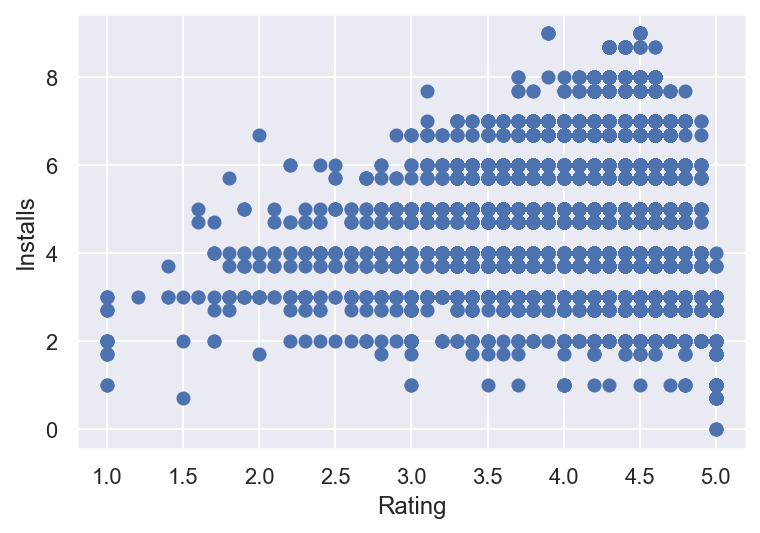

In [25]:
plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

### [Quiz 9] X축이 Rating, Y축이 Reviews인 점 그래프를 그려봅니다. <br> 이 때, Reviews의 값에 log10을 씌우고, Type으로 GroupBy 하여 Type의 값이 'Free'인 경우는 'red', 'Paid'인 경우는 'green' 으로 표시합니다.

In [26]:
# groupby 후 get_group을 활용하여 type이 Paid인 값을 뽑아냅니다.
df_green = visual_data.groupby('Type')['Reviews', 'Rating'].get_group('Paid')
x_g = df_green['Rating']
y_g = np.log10(df_green['Reviews'])
print(x_g, y_g)

234      4.7
235      4.8
290      4.7
291      4.8
477      2.6
        ... 
10690    5.0
10697    5.0
10760    4.4
10782    3.8
10785    4.2
Name: Rating, Length: 579, dtype: float64 234      4.058502
235      4.012626
290      4.058502
291      4.012626
477      1.755875
           ...   
10690    0.698970
10697    0.301030
10760    1.544068
10782    2.401401
10785    3.147676
Name: Reviews, Length: 579, dtype: float64


/Users/jeongseong-yong/opt/anaconda3/envs/bit-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [27]:
## groupby 후 get_group을 활용하여 type이 Free인 값을 뽑아냅니다.
df_red = visual_data.groupby('Type')['Reviews', 'Rating'].get_group('Free')
x_r = df_red['Rating']
y_r = np.log10(df_red['Reviews'])
print(x_r, y_r)

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7150, dtype: float64 0        2.201397
1        2.985426
2        4.942058
3        5.333737
4        2.985426
           ...   
10833    1.643453
10834    0.845098
10836    1.579784
10837    0.602060
10840    5.600218
Name: Reviews, Length: 7150, dtype: float64


/Users/jeongseong-yong/opt/anaconda3/envs/bit-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0, 0.5, 'Y')

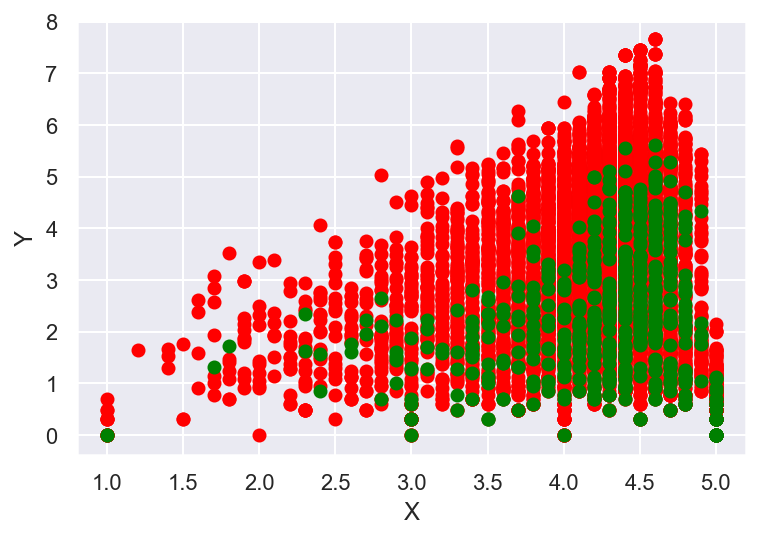

In [28]:
plt.scatter(x_r,y_r,c="red")
plt.scatter(x_g,y_g,c="green")
plt.xlabel("X")
plt.ylabel("Y")

---
## 5. 데이터 분석

### **해당 챕터의 목표**
- 시각화의 결과로 얻어진 insight를 기반으로 하여 데이터의 수치적인 부분의 토대를 마련합니다.
- 데이터의 평균, 중앙값, 최대값, 최소값 등 수치적인 데이터를 구해봅니다.

제공되는 코드

In [29]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
analysis_data = data.copy()
analysis_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


### _데이터 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, value_counts, pie, show, round, mean, groupby, get_group
- 모든 정답은 소수점 2자리까지 출력합니다. 단, 2번 문제의 경우 autopct='%1.2f%%' 파라미터 사용, 그 외는 round 함수 사용 

### [Quiz 10] Rating, Intalls가 Nan인 데이터는 제거합니다.

In [30]:
analysis_data = analysis_data[analysis_data['Rating'].notnull() & analysis_data['Installs'].notnull()]
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7729 non-null   object 
 1   Category        7729 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         7729 non-null   int64  
 4   Size            7729 non-null   object 
 5   Installs        7729 non-null   int64  
 6   Type            7729 non-null   object 
 7   Price           7729 non-null   object 
 8   Content Rating  7729 non-null   object 
 9   Genres          7729 non-null   object 
 10  Last Updated    7729 non-null   object 
 11  Current Ver     7725 non-null   object 
 12  Android Ver     7727 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 845.4+ KB


### [Quiz 11] Category별 구글 플레이 스토어 점유율을 파이 그래프로 그려봅니다. 

In [31]:
# category 별 점유율 확인 
# 5,6번째 값이 같아 top5중 어떤 카테고리가 선택되느냐에 따라 최종결과가 다를 수 있습니다.
c_data = analysis_data['Category'].value_counts()
c_data

FAMILY                 1617
GAME                    974
TOOLS                   634
MEDICAL                 324
PERSONALIZATION         280
LIFESTYLE               280
FINANCE                 266
SPORTS                  247
BUSINESS                246
PHOTOGRAPHY             236
PRODUCTIVITY            235
HEALTH_AND_FITNESS      223
COMMUNICATION           211
SHOPPING                179
SOCIAL                  177
DATING                  173
NEWS_AND_MAGAZINES      169
TRAVEL_AND_LOCAL        160
BOOKS_AND_REFERENCE     144
VIDEO_PLAYERS           116
EDUCATION               110
MAPS_AND_NAVIGATION      95
ENTERTAINMENT            90
FOOD_AND_DRINK           84
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       62
ART_AND_DESIGN           59
HOUSE_AND_HOME           56
WEATHER                  51
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

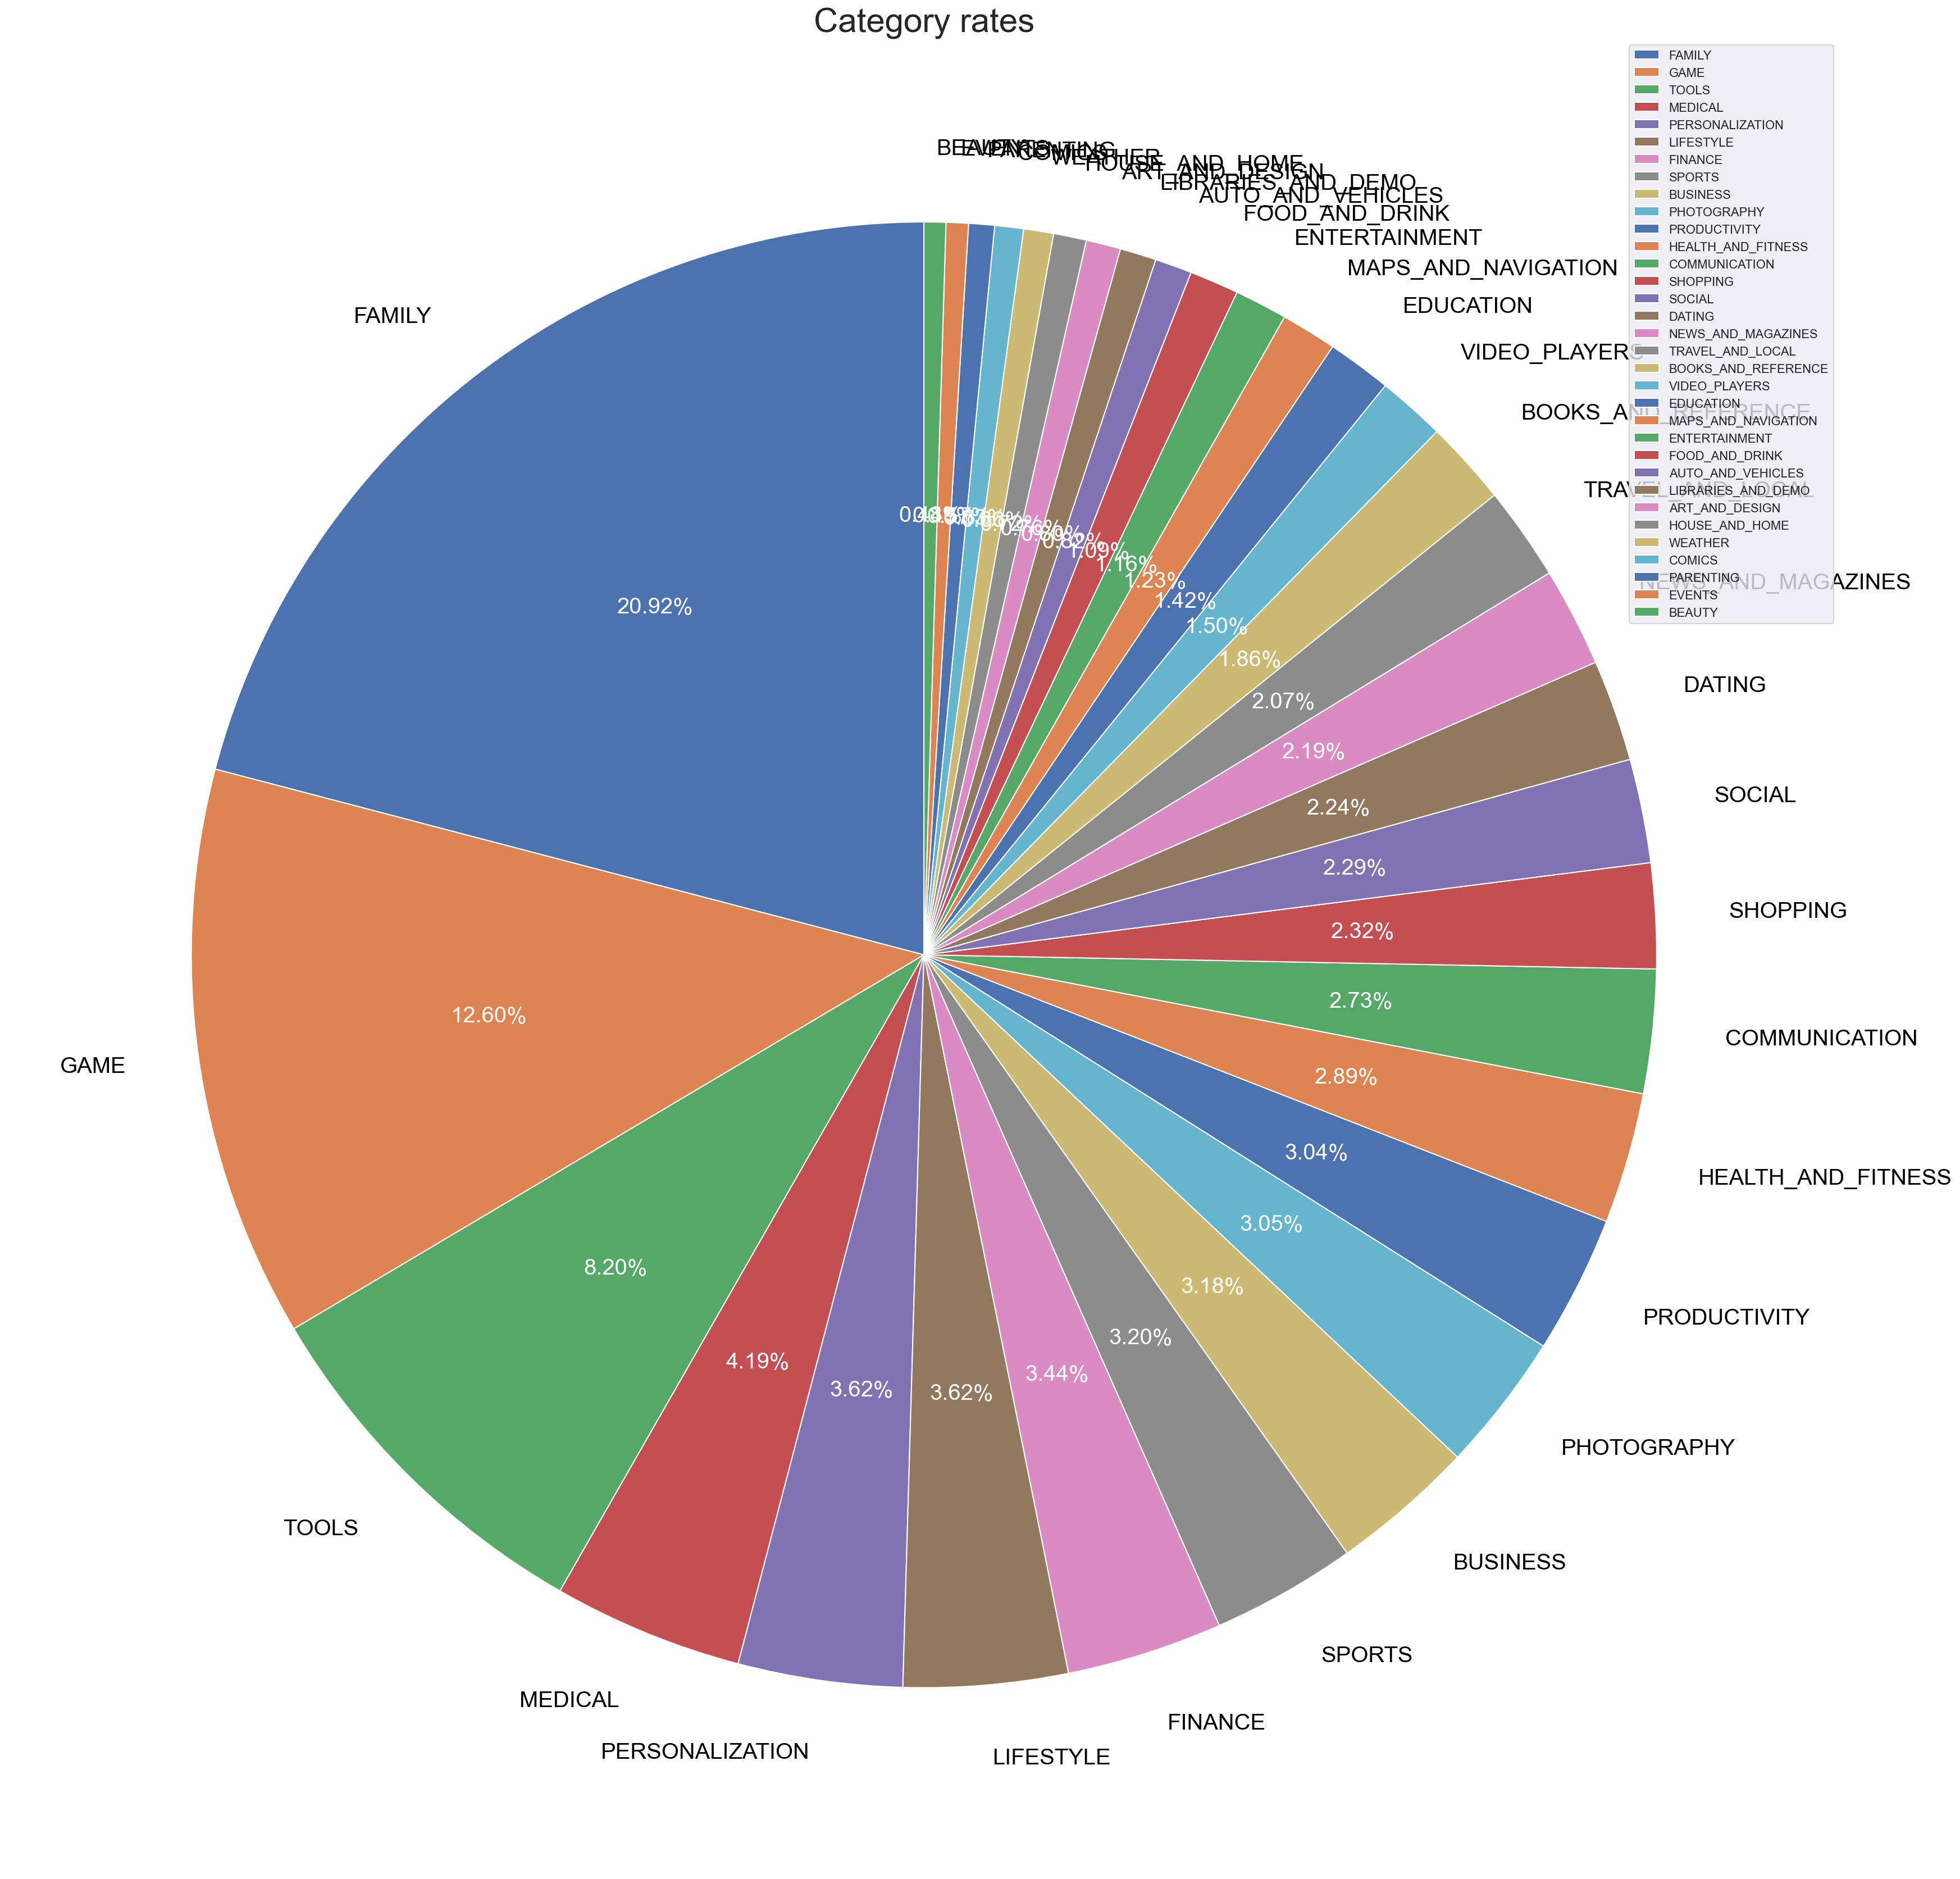

In [32]:
plt.figure(figsize = (30, 30))

patches, texts, autotexts = plt.pie(c_data.values, 
                                    labels=c_data.index,  
                                    autopct='%1.2f%%', 
                                    startangle=90)

plt.title('Category rates', fontsize=30)

# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(20)
    t.set_color('black')
    
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
plt.legend(patches, c_data.index, loc="best")
plt.show()

### [Quiz 12] 점유율 상위 5개의 카테고리를 구하고, 각각의 Rating 평균, Installs 평균을 구해봅니다.



In [33]:
# 점유율 top 5 
c_data_5 = c_data[:5]
c_data_5

FAMILY             1617
GAME                974
TOOLS               634
MEDICAL             324
PERSONALIZATION     280
Name: Category, dtype: int64

In [34]:
top_5 = c_data_5.index.values
top_5

array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'PERSONALIZATION'],
      dtype=object)

In [35]:
# isin()함수에 top_5를 넣어 추려냅니다.
analysis_data_5 = analysis_data[analysis_data['Category'].isin(top_5)]
analysis_data_5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,10000000,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000,Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [36]:
# 해당 카테고리별 rating installs의 평균을 구합니다.
# 결과를 구해보시면 숫자 끝에 e+06이런식으로 나타나는데 10의 6승을 곱한다는 의미입니다.
# 값이 크거나 작을때 파이썬에서 이와같이 표시됩니다.
# analysis_data_5.groupby('Category')['Rating', 'Installs'].mean()
# 소수점이 많아 2째자리까지 반올림해서 보여드립니다.
round(analysis_data_5.groupby('Category')['Rating', 'Installs'].mean(), 2)

/Users/jeongseong-yong/opt/anaconda3/envs/bit-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Rating,Installs
Category,,
FAMILY,4.19,4204349.77
GAME,4.27,30671922.71
MEDICAL,4.18,143497.15
PERSONALIZATION,4.32,3564796.18
TOOLS,4.01,5561598.58


### [Quiz 13] 점유율 상위 5개의 카테고리중 Rating 평균이 가장 높은 Category를 구하고 해당 Category 데이터를 Type별로 GroupBy한 후 Rating, Installs 평균을 구해봅니다.


In [37]:
# top 5 rating, installs 의 평균을 찾고
analysis_data_5_mean = round(analysis_data_5.groupby('Category')['Rating', 'Installs'].mean(), 2)
analysis_data_5_mean

/Users/jeongseong-yong/opt/anaconda3/envs/bit-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Rating,Installs
Category,,
FAMILY,4.19,4204349.77
GAME,4.27,30671922.71
MEDICAL,4.18,143497.15
PERSONALIZATION,4.32,3564796.18
TOOLS,4.01,5561598.58


In [38]:
# 정렬을 통해 rating이 제일 높은 값을 찾습니다.
analysis_data_5_mean.sort_values(by='Rating', ascending=False)

,Rating,Installs
Category,,
PERSONALIZATION,4.32,3564796.18
GAME,4.27,30671922.71
FAMILY,4.19,4204349.77
MEDICAL,4.18,143497.15
TOOLS,4.01,5561598.58


In [39]:
# PERSONALIZATION가 제일높아서 PERSONALIZATION만 뽑아낸 후
best_rate = analysis_data_5[analysis_data_5['Category'] == 'PERSONALIZATION']
best_rate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3353,Funny Ringtones,PERSONALIZATION,4.4,7146,14M,1000000,Free,0,Everyone 10+,Personalization,"February 2, 2018",1.1,4.0 and up
3355,"XOS - Launcher,Theme,Wallpaper",PERSONALIZATION,4.6,49657,8.7M,5000000,Free,0,Everyone,Personalization,"August 6, 2018",3.6.21_pre,4.4 and up
3356,3D Live Neon Weed Launcher,PERSONALIZATION,4.5,1724,21M,100000,Free,0,Mature 17+,Personalization,"June 26, 2018",5.34.10,4.0.3 and up
3358,Golden Launcher,PERSONALIZATION,4.4,32794,12M,5000000,Free,0,Everyone,Personalization,"July 31, 2018",1.284.1.83,4.2 and up
3359,Launcher,PERSONALIZATION,4.5,102923,18M,1000000,Free,0,Everyone,Personalization,"July 10, 2018",2.1.2,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100,Paid,$0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10710,Stylish Fonts,PERSONALIZATION,3.8,153176,4.3M,10000000,Free,0,Everyone,Personalization,"August 7, 2018",1.17,4.0.3 and up
10722,Launcher Theme for LG K10 2018,PERSONALIZATION,4.0,649,11M,100000,Free,0,Everyone,Personalization,"March 30, 2017",1.0,2.3.3 and up
10733,FP Click sound changer,PERSONALIZATION,3.5,178,1.4M,10000,Free,0,Everyone,Personalization,"December 26, 2015",1.0,1.6 and up


In [40]:
# type별 rating, installs의 평균을 구합니다.
round(best_rate.groupby('Type')['Rating', 'Installs'].mean(), 2)

/Users/jeongseong-yong/opt/anaconda3/envs/bit-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Rating,Installs
Type,,
Free,4.29,4597659.31
Paid,4.43,78883.12
